![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39129299-787f2b38-470a-11e8-958e-84f118846629.jpg"
    style="width:250px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: Diabetes Analysis

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

<i>
> Dataset source: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html <br>
> Dataset description: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst
</i>

### Data Set Characteristics

Take a look at the structure of it and the fields it has. You will notice that **it doesn't have a header**. Don't worry, we have you covered; this is the description of each one of the fields in the CSV file:

- **Age**	
- **Sex**	
- **Body mass index**
- **Average blood pressure**
- **S1**
- **S2**
- **S3**
- **S4**
- **S5**
- **S6**

<i>Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).</i>

- Number of Instances: 442
- Number of Attributes:	First 10 columns are numeric predictive values
- Target: Column 11 is a quantitative measure of disease progression one year after baseline

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Hands on! 

Let's start analyzing it!

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline
sns.set(rc={'figure.figsize': (18, 6)})

import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset `diabetes` calling sklearn `load_diabetes()` in a DataFrame structure, also show it's shape and first rows.
        </td>
    </tr>
</table>

In [69]:
# Your code goes here
diabetes=load_diabetes()
diabetes.data.shape

(442, 10)

In [70]:
diabetes.data[:10]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [71]:
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [72]:
df_no_target=df.copy()

In [73]:
df['target']=diabetes.target

In [74]:
df.shape

(442, 11)

In [75]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Show a **boxplot** of each variable, except `target`.
        </td>
    </tr>
</table>

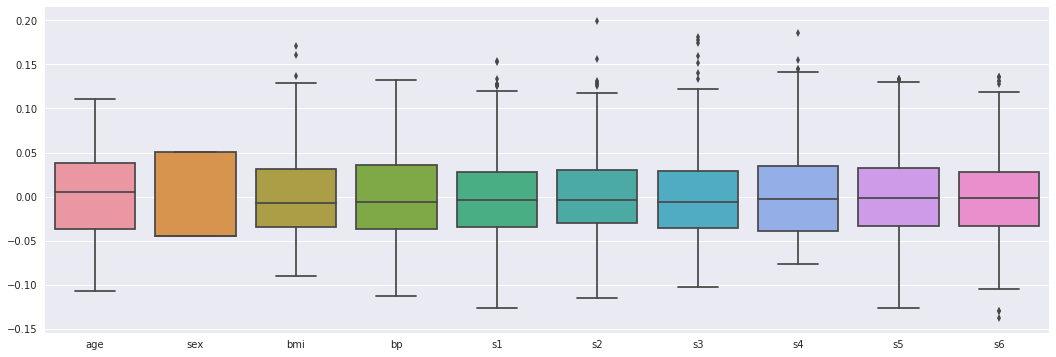

In [76]:
sns.boxplot(data=df_no_target)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

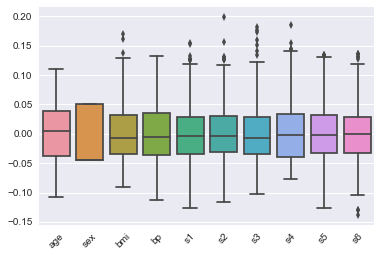

In [4]:
# Your code goes here

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3.</span>
            Show the distribution of `target` column using **distplot**.
        </td>
    </tr>
</table>

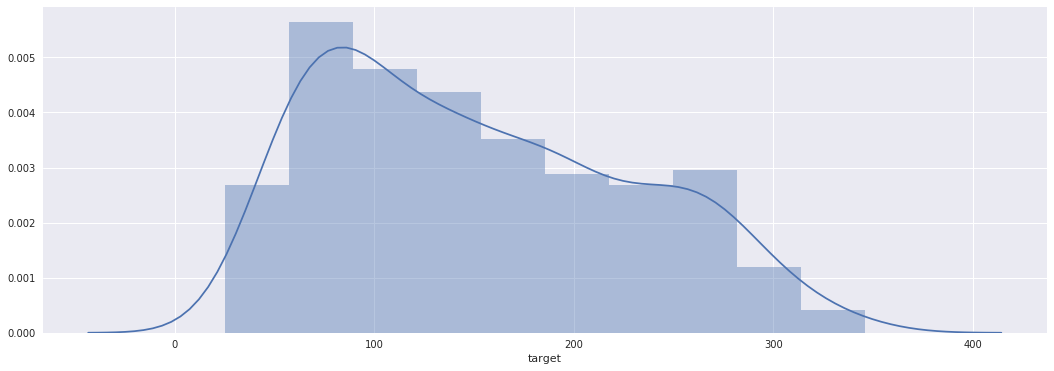

In [81]:
sns.distplot(df.target)

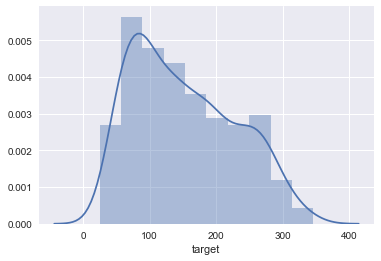

In [5]:
# Your code goes here



---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Create **X** with predictor variables, and **Y** with the target variable. Verify the shape of both X and Y.
        </td>
    </tr>
</table>

In [85]:
# Your code goes here
y=df.target
X = df.drop(columns=['target'])

In [86]:
print(y.shape)
print(x.shape)

(442,)
(442, 10)


---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Create **train/test partitions** <i>(X_train, X_test, Y_train, Y_test)</i> using sklearn `train_test_split` function, with `test_size=0.3`.
        </td>
    </tr>
</table>

In [87]:
from sklearn.model_selection import train_test_split

# Your code goes here

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6.</span>
            Create a **LinearRegression()** object and fit it with `X_train` and `Y_train`.
        </td>
    </tr>
</table>

In [89]:
from sklearn.linear_model import LinearRegression

# Your code goes here

linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Now `predict` new values using <i>X_test</i>.
        </td>
    </tr>
</table>

In [94]:
# Your code goes here

Y_pred=linreg.predict(X_test)

In [95]:
Y_pred

array([117.35541381, 107.59202338, 186.61179646,  65.02286063,
       172.78743524, 191.64000276, 221.50652506, 119.88575723,
       156.46296737, 127.89038815, 212.05672214, 199.34476789,
        90.37730324,  76.82050566, 236.71394446, 206.71336696,
       180.32837703, 100.05835512, 112.37589792, 168.86573603,
       188.09053989,  82.77087942, 141.21404368, 105.81238053,
        89.77151708, 211.90262449,  94.67357952, 176.91838116,
       120.89210364, 181.65959831, 155.32809924, 134.347891  ,
       192.85071368, 100.94007731, 159.99780213, 190.99271855,
       103.1636765 , 247.61423978, 171.12519923, 187.45113092,
       159.61498235, 181.78694689, 120.56620353, 122.0031831 ,
       147.18827099, 199.39730487, 151.79866761, 136.85643227,
       191.46430494, 190.29062107,  65.0052002 , 158.25833875,
       106.01377574, 145.50612207, 187.81178472, 121.3717008 ,
       161.9028546 ,  81.63016426,  52.32981134,  80.46006467,
       100.44709034, 203.74488898, 170.11764964, 107.35

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Check `r2_score` and `mean_absolute_error` of your prediction.
        </td>
    </tr>
</table>

In [109]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean absolute error: 41.65
Variance score: 0.44


In [10]:
# Your code goes here



Mean Absolute Error (MAE): 39.211135948201104
Variance score (R^2): 0.5789660549617198


---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Show a `scatter` with `Y_test` over predicted values, and draw a line of the predicted values.
        </td>
    </tr>
</table>

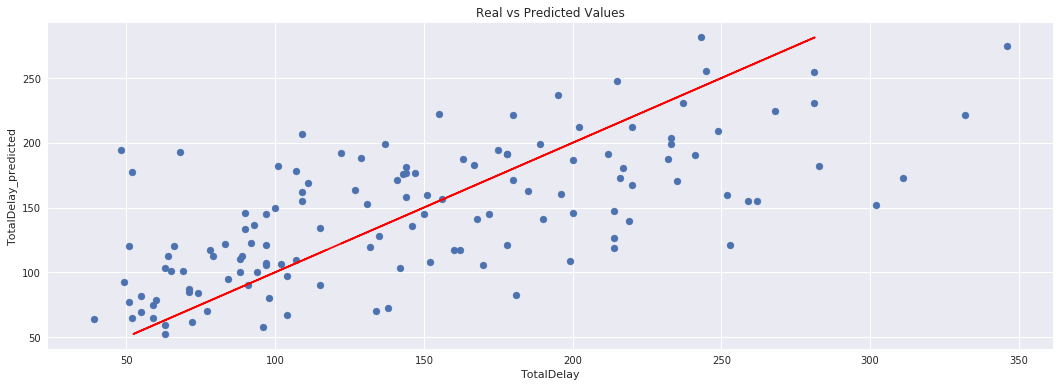

In [110]:
plt.title('Real vs Predicted Values')
plt.xlabel('TotalDelay')
plt.ylabel('TotalDelay_predicted')

plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red')

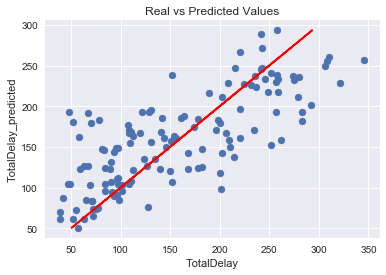

In [11]:
# Your code goes here



---

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Optional exercises

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            Go further and make a **CrossValidation** evaluation using **10 k-fold**. Show the mean of all the errors using `cross_val_score`.
        </td>
    </tr>
</table>

In [12]:
# Your code goes here



MAE: [31.77850442 48.28381105 49.15397342]
MAE_mean: 43.07209629595847


![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)